In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

In [4]:
data = pd.read_csv("/content/drive/MyDrive/Sem 5&6/BDA_Project/TMDBBoxOffice Revenue/train.csv")
print(data.shape)
data.head(n=2)

(3000, 23)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


# Exploratory Data

In [5]:
data_explore = data.copy()

In [6]:
data_explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [7]:
data_explore.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [8]:
data_explore['is_sequel'] = data_explore['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1).astype('int64')

In [9]:
def modify_date(x):
    """
    Given data format is mm/dd/YY. This function will extract the year, month and day on which movie is release.
    """
    x=str(x)
    year=x.split('/')[2]
    if int(year)<20:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
    
data_explore['release_date']=data_explore['release_date'].apply(lambda x: modify_date(x))
data_explore['release_year'] = pd.DatetimeIndex(data_explore['release_date']).year
data_explore['release_month'] = pd.DatetimeIndex(data_explore['release_date']).month
data_explore['release_day'] = pd.DatetimeIndex(data_explore['release_date']).day
data_explore['release_dow'] = pd.DatetimeIndex(data_explore['release_date']).dayofweek

In [10]:


drop_cols = ['id', 'belongs_to_collection', 'homepage', 'imdb_id', 'release_date', 'poster_path', 'tagline', 'title']
data_explore = data_explore.drop(columns=drop_cols, axis=1)



In [11]:


nan_cols = data_explore.isna().sum()
nan_cols[nan_cols>0]



genres                    7
overview                  8
production_companies    156
production_countries     55
runtime                   2
spoken_languages         20
Keywords                276
cast                     13
crew                     16
dtype: int64

In [12]:
import ast
dict_cols = ['genres', 'production_companies', 'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x))

In [13]:
na_cols = data_explore.columns[data_explore.isna().any()].tolist()
#na_cols.remove('overview')
#na_cols.remove('runtime')
data_explore['runtime'].fillna(value=data_explore['runtime'].median(), inplace=True)
data_explore['overview'].fillna(value='', inplace=True)
for col in na_cols:
    data_explore[col].fillna(value='', inplace=True)

In [14]:
def get_names(x, col):
    """
        Get the name field from each JSON object.
        For crew field, considering the Director only.
        For cast field, considering the first 3 cast members. Generally they are the main roles from movie.
    """
    names = []
    for item in x:
        if col=='crew':
            if item['job']=='Director':
                names.append(item['name'])
        elif col=='cast':
            if item['order'] in (0, 1, 2):
                names.append(item['name'])
        else:
            names.append(item['name'])
    return names
    
for col in dict_cols:
    data_explore[col] = data_explore[col].apply(lambda x: get_names(x, col))

In [15]:
data_explore.head(n=3)

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,cast,crew,revenue,is_sequel,release_year,release_month,release_day,release_dow
0,14000000,[Comedy],en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,[English],Released,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,1,2015,2,20,4
1,40000000,"[Comedy, Drama, Family, Romance]",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,[Walt Disney Pictures],[United States of America],113.0,[English],Released,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,1,2004,8,6,4
2,3300000,[Drama],en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,[English],Released,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist]",[Damien Chazelle],13092000,0,2014,10,10,4


In [16]:
Q1 = data_explore.quantile(0.25)
Q3 = data_explore.quantile(0.75)
IQR = Q3 - Q1
outliers = ((data_explore < (Q1 - 1.5 * IQR)) | (data_explore > (Q3 + 1.5 * IQR))).sum()
outliers[outliers>0]

budget          249
is_sequel       604
popularity       70
release_year    124
revenue         315
runtime         126
dtype: int64

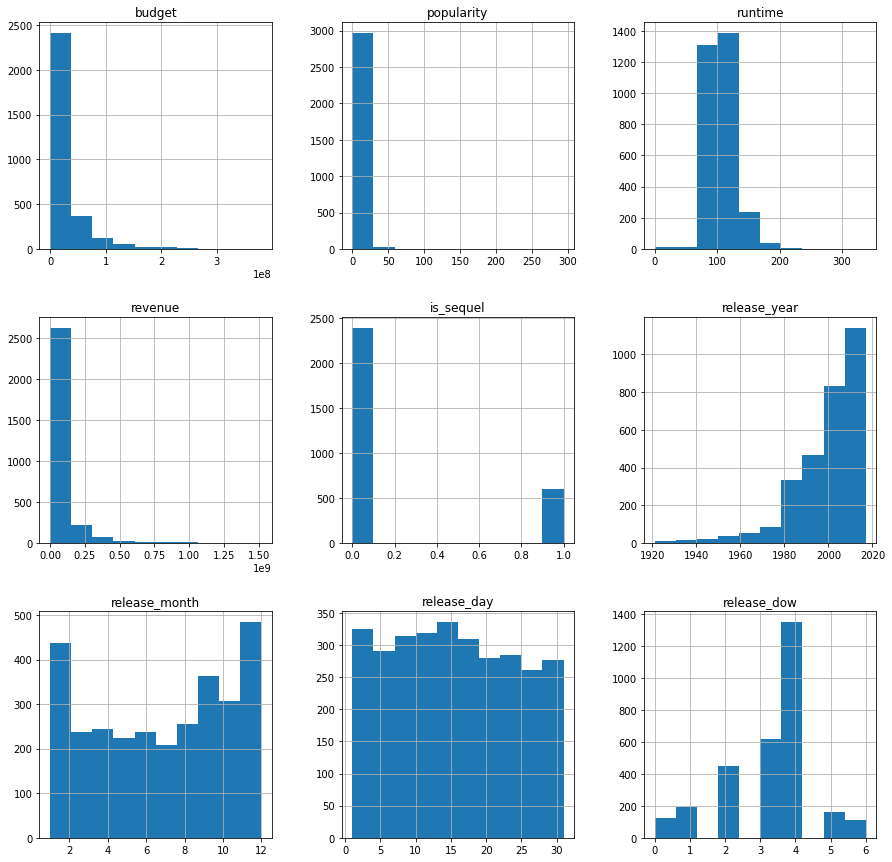

In [17]:
data_explore.hist(figsize=(15, 15))
plt.show()

# Top 20 

Top 20 Most Popular Movies

In [18]:
most_popular_movies = data_explore.sort_values('popularity', ascending=False).head(n=20)
most_popular_movies['revenue(million)'] = most_popular_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_popular_movies['budget(million)'] = most_popular_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
most_popular_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,budget(million),revenue(million)
518,"[Action, Adventure, Fantasy]",Wonder Woman,"[Dune Entertainment, Atlas Entertainment, Warn...",294.337037,[],[],149,820
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
1695,"[Action, Crime]",Baby Driver,"[Big Talk Productions, TriStar Pictures, Media...",228.032744,"[Ansel Elgort, Lily James, Kevin Spacey]",[Edgar Wright],34,224
2326,"[Action, Adventure, Comedy]",Deadpool,"[Twentieth Century Fox Film Corporation, Marve...",187.860492,"[Ryan Reynolds, Morena Baccarin, Ed Skrein]",[Tim Miller],58,783
2126,"[Action, Adventure, Comedy, Science Fiction]",Guardians of the Galaxy Vol. 2,"[Walt Disney Pictures, Marvel Studios]",185.330992,"[Chris Pratt, Zoe Saldana, Dave Bautista]",[James Gunn],200,863
1309,"[Mystery, Thriller, Drama]",Gone Girl,"[Twentieth Century Fox Film Corporation, Regen...",154.801009,"[Ben Affleck, Rosamund Pike, Carrie Coon]",[David Fincher],61,369
1715,"[Drama, Science Fiction, War]",War for the Planet of the Apes,[Chernin Entertainment],146.161786,"[Andy Serkis, Woody Harrelson, Steve Zahn]",[Matt Reeves],152,369
1673,"[Drama, Action, Crime, Thriller]",The Dark Knight,"[DC Comics, Legendary Pictures, Warner Bros., ...",123.167259,"[Christian Bale, Michael Caine, Heath Ledger]",[Christopher Nolan],185,1004
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
2293,"[Drama, Thriller, Science Fiction]",The Circle,"[Likely Story, Playtone, Image Nation]",88.439243,"[Emma Watson, Tom Hanks, John Boyega]",[James Ponsoldt],18,20


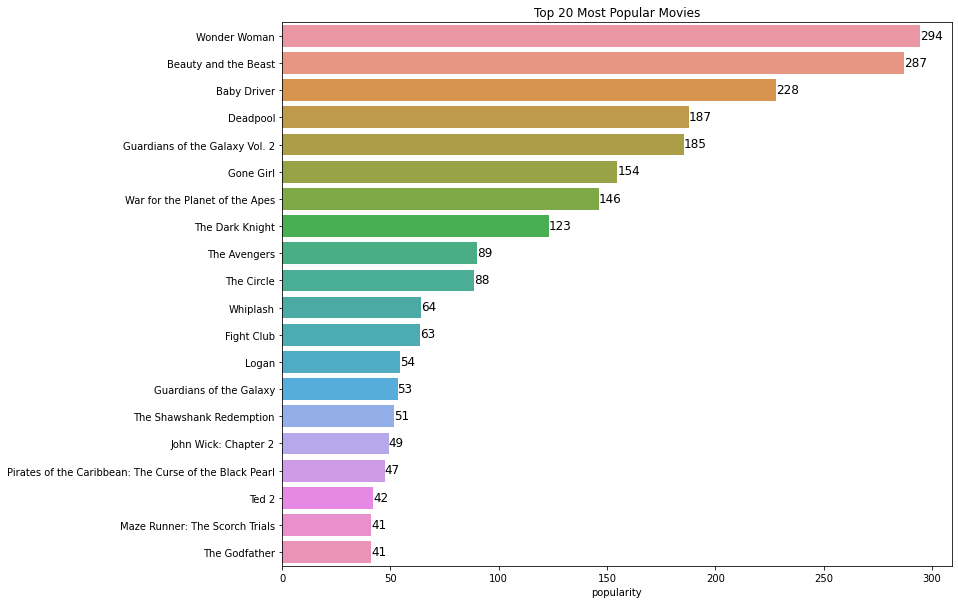

In [19]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='popularity', data=most_popular_movies, order=most_popular_movies.sort_values('popularity', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 Most Popular Movies', fontsize=12)
plt.ylabel('')
plt.show()

Top 20 highest Revenue Movies

In [20]:
highest_revenue_movies = data_explore.sort_values('revenue', ascending=False).head(n=20)
highest_revenue_movies['revenue(million)'] = highest_revenue_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_revenue_movies['budget(million)'] = highest_revenue_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
highest_revenue_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,budget(million),revenue(million)
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519
1761,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",27.275687,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],190,1506
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262
2322,"[Action, Science Fiction, Adventure]",Transformers: Dark of the Moon,"[Paramount Pictures, Di Bonaventura Pictures, ...",4.503505,"[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],195,1123
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,[],[],250,1084
2135,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films...",27.887720,"[Johnny Depp, Pen√©lope Cruz, Ian McShane]",[Rob Marshall],380,1045
2562,"[Adventure, Animation, Comedy, Family]",Finding Dory,"[Walt Disney Pictures, Pixar Animation Studios...",14.477677,"[Ellen DeGeneres, Albert Brooks, Hayden Rolence]","[Andrew Stanton, Angus MacLane]",200,1028
881,"[Family, Fantasy, Adventure]",Alice in Wonderland,"[Walt Disney Pictures, Team Todd, Tim Burton P...",17.285093,"[Mia Wasikowska, Johnny Depp, Anne Hathaway]",[Tim Burton],200,1025
734,"[Animation, Adventure, Family, Comedy]",Zootopia,"[Walt Disney Pictures, Walt Disney Animation S...",26.024868,"[Ginnifer Goodwin, Jason Bateman, Shakira]","[Byron Howard, Rich Moore, Jared Bush]",150,1023


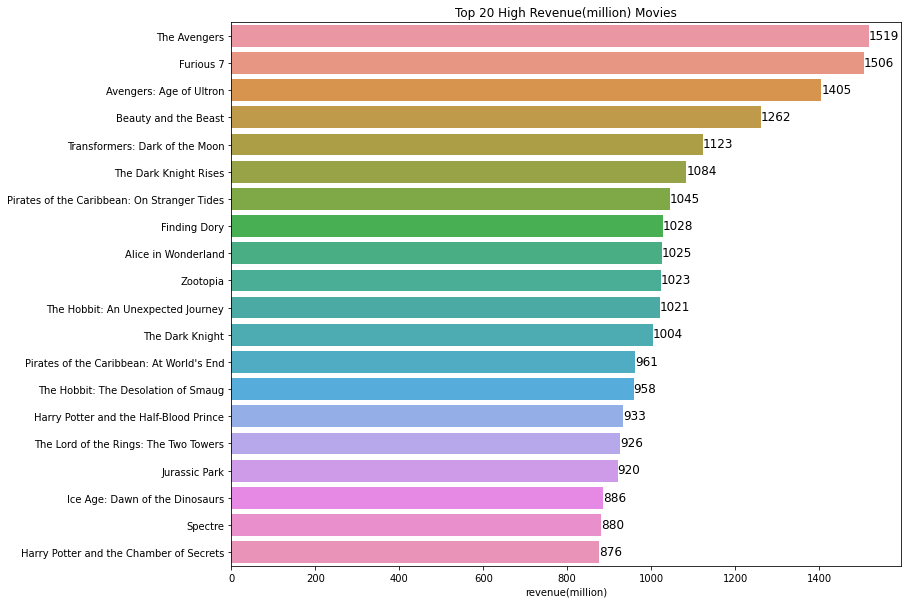

In [21]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='revenue(million)', data=highest_revenue_movies, order=highest_revenue_movies.sort_values('revenue(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 High Revenue(million) Movies', fontsize=12)
plt.ylabel('')
plt.show()

Top 20 highest budget Movies

In [22]:
highest_budget_movies = data_explore.sort_values('budget', ascending=False).head(n=20)
highest_budget_movies['revenue(million)'] = highest_budget_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
highest_budget_movies['budget(million)'] = highest_budget_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
highest_budget_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)']]

,genres,original_title,production_companies,popularity,cast,crew,budget(million),revenue(million)
2135,"[Adventure, Action, Fantasy]",Pirates of the Caribbean: On Stranger Tides,"[Walt Disney Pictures, Jerry Bruckheimer Films...",27.887720,"[Johnny Depp, Pen√©lope Cruz, Ian McShane]",[Rob Marshall],380,1045
2209,"[Adventure, Fantasy, Action]",Pirates of the Caribbean: At World's End,"[Walt Disney Pictures, Jerry Bruckheimer Films...",31.363664,"[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski],300,961
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405
1425,"[Adventure, Fantasy, Action, Science Fiction]",Superman Returns,"[DC Comics, Legendary Pictures, Warner Bros., ...",13.284712,"[Brandon Routh, Kevin Spacey, Kate Bosworth]",[Bryan Singer],270,391
1270,"[Action, Adventure, Science Fiction]",John Carter,[Walt Disney Pictures],14.670353,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton],260,284
1630,"[Action, Science Fiction, Thriller, Adventure]",Transformers: The Last Knight,"[Paramount Pictures, Di Bonaventura Pictures, ...",39.186819,"[Mark Wahlberg, Josh Duhamel, Laura Haddock]",[Michael Bay],260,604
2532,"[Adventure, Fantasy, Action]",The Hobbit: An Unexpected Journey,"[WingNut Films, New Line Cinema, Warner Bros. ...",23.253089,"[Ian McKellen, Martin Freeman, Richard Armitage]",[Peter Jackson],250,1021
961,"[Adventure, Fantasy, Family]",Harry Potter and the Half-Blood Prince,"[Warner Bros., Heyday Films]",19.083723,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",[David Yates],250,933
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,[],[],250,1084
666,"[Adventure, Fantasy]",The Hobbit: The Desolation of Smaug,"[WingNut Films, New Line Cinema, Warner Bros. ...",20.644776,"[Martin Freeman, Ian McKellen, Richard Armitage]",[Peter Jackson],250,958


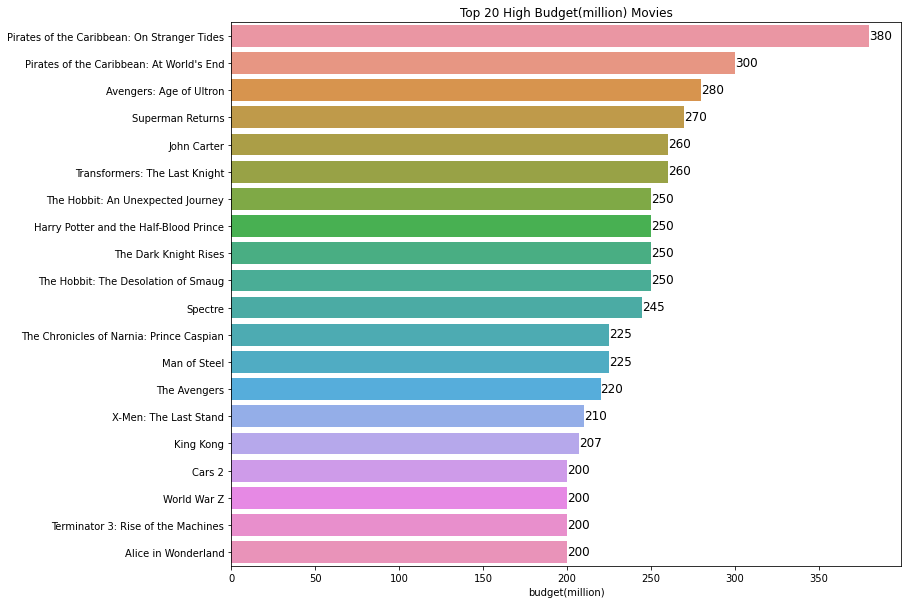

In [23]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='budget(million)', data=highest_budget_movies, order=highest_budget_movies.sort_values('budget(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 High Budget(million) Movies', fontsize=12)
plt.ylabel('')
plt.show()

Top 20 highest Grossing Movies

In [24]:
most_profit_movies = data_explore.copy()
most_profit_movies['revenue(million)'] = most_profit_movies['revenue'].apply(lambda x : x//1000000)    # revenue in millions
most_profit_movies['budget(million)'] = most_profit_movies['budget'].apply(lambda x : x//1000000)    # revenue in millions
most_profit_movies['profit(million)'] = most_profit_movies['revenue(million)']-most_profit_movies['budget(million)']
most_profit_movies = most_profit_movies.sort_values('profit(million)', ascending=False).head(n=20)
most_profit_movies[['genres', 'original_title', 'production_companies', 'popularity', 'cast', 'crew', 'budget(million)', 'revenue(million)', 'profit(million)']]

,genres,original_title,production_companies,popularity,cast,crew,budget(million),revenue(million),profit(million)
1761,[Action],Furious 7,"[Universal Pictures, Original Film, Fuji Telev...",27.275687,"[Vin Diesel, Paul Walker, Dwayne Johnson]",[James Wan],190,1506,1316
1126,"[Science Fiction, Action, Adventure]",The Avengers,"[Paramount Pictures, Marvel Studios]",89.887648,"[Robert Downey Jr., Chris Evans, Mark Ruffalo]",[Joss Whedon],220,1519,1299
2770,"[Action, Adventure, Science Fiction]",Avengers: Age of Ultron,"[Marvel Studios, Prime Focus, Revolution Sun S...",37.379420,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",[Joss Whedon],280,1405,1125
684,"[Family, Fantasy, Romance]",Beauty and the Beast,"[Walt Disney Pictures, Mandeville Films]",287.253654,"[Emma Watson, Dan Stevens, Luke Evans]",[Bill Condon],160,1262,1102
2322,"[Action, Science Fiction, Adventure]",Transformers: Dark of the Moon,"[Paramount Pictures, Di Bonaventura Pictures, ...",4.503505,"[Shia LaBeouf, John Malkovich, Ken Jeong]",[Michael Bay],195,1123,928
734,"[Animation, Adventure, Family, Comedy]",Zootopia,"[Walt Disney Pictures, Walt Disney Animation S...",26.024868,"[Ginnifer Goodwin, Jason Bateman, Shakira]","[Byron Howard, Rich Moore, Jared Bush]",150,1023,873
1735,"[Adventure, Science Fiction]",Jurassic Park,"[Universal Pictures, Amblin Entertainment]",8.863776,"[Sam Neill, Laura Dern, Jeff Goldblum]",[Steven Spielberg],63,920,857
543,"[Adventure, Fantasy, Action]",The Lord of the Rings: The Two Towers,"[WingNut Films, New Line Cinema, The Saul Zaen...",29.423537,"[Elijah Wood, Ian McKellen, Viggo Mortensen]",[Peter Jackson],79,926,847
906,"[Action, Crime, Drama, Thriller]",The Dark Knight Rises,"[Legendary Pictures, Warner Bros., DC Entertai...",20.582580,[],[],250,1084,834
2562,"[Adventure, Animation, Comedy, Family]",Finding Dory,"[Walt Disney Pictures, Pixar Animation Studios...",14.477677,"[Ellen DeGeneres, Albert Brooks, Hayden Rolence]","[Andrew Stanton, Angus MacLane]",200,1028,828


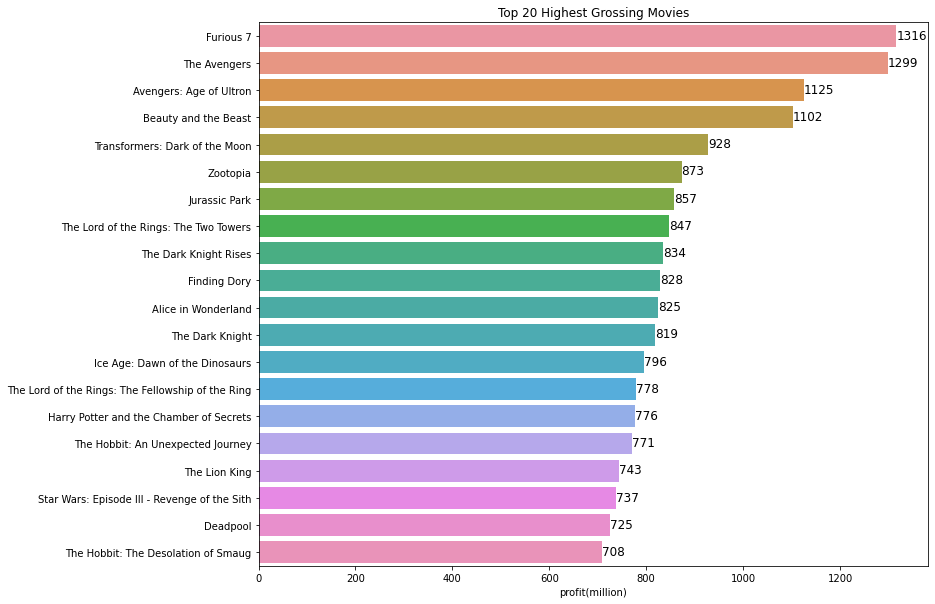

In [25]:
plt.figure(figsize=(12, 10))
ax = sns.barplot(y='original_title', x='profit(million)', data=most_profit_movies, order=most_profit_movies.sort_values('profit(million)', ascending=False).original_title, orient='h')
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_width())), (p.get_width(), p.get_y()+0.5), fontsize=12)
plt.title('Top 20 Highest Grossing Movies', fontsize=12)
plt.ylabel('')
plt.show()

Genres

In [26]:
data_explore_enc = data_explore['genres'].apply(lambda x: pd.Series([1] * len(x), index=x)).fillna(0, downcast='infer')
data_explore_genres = pd.concat([data_explore, data_explore_enc], axis=1)
genres = data_explore_enc.columns
data_explore_genres.head(n=3)

,budget,genres,original_language,original_title,overview,popularity,production_companies,production_countries,runtime,spoken_languages,status,Keywords,cast,crew,revenue,is_sequel,release_year,release_month,release_day,release_dow,Comedy,Drama,Family,Romance,Thriller,Action,Animation,Adventure,Horror,Documentary,Music,Crime,Science Fiction,Mystery,Foreign,Fantasy,War,Western,History,TV Movie
0,14000000,[Comedy],en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,"[Paramount Pictures, United Artists, Metro-Gol...",[United States of America],93.0,[English],Released,"[time travel, sequel, hot tub, duringcreditsst...","[Rob Corddry, Craig Robinson, Clark Duke]",[Steve Pink],12314651,1,2015,2,20,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,40000000,"[Comedy, Drama, Family, Romance]",en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,[Walt Disney Pictures],[United States of America],113.0,[English],Released,"[coronation, duty, marriage, falling in love]","[Anne Hathaway, Julie Andrews, H√©ctor Elizondo]",[Garry Marshall],95149435,1,2004,8,6,4,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3300000,[Drama],en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,"[Bold Films, Blumhouse Productions, Right of W...",[United States of America],105.0,[English],Released,"[jazz, obsession, conservatory, music teacher,...","[Miles Teller, J.K. Simmons, Melissa Benoist]",[Damien Chazelle],13092000,0,2014,10,10,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
genres_info = []
for col in genres:
    total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity=0, 0, 0, 0, 0, 0
    total_movies = data_explore_genres[data_explore_genres[col]==1][col].count()
    total_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].sum()
    median_budget = data_explore_genres[data_explore_genres[col]==1]['budget'].median()
    total_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].sum()
    median_revenue = data_explore_genres[data_explore_genres[col]==1]['revenue'].median()
    median_popularity = data_explore_genres[data_explore_genres[col]==1]['popularity'].median()
    genres_info.append([col, total_movies, total_budget, median_budget, total_revenue, median_revenue, median_popularity])

In [28]:
genres_info = pd.DataFrame(genres_info, columns=['genres', 'movies_count', 'total_budget', 'median_budget', 'total_revenue', 'median_revenue', 'median_popularity'])
genres_info['total_budget(million)'] = genres_info['total_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['median_budget(million)'] = genres_info['median_budget'].apply(lambda x : x//1000000)    # budget in millions
genres_info['total_revenue(million)'] = genres_info['total_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info['median_revenue(million)'] = genres_info['median_revenue'].apply(lambda x : x//1000000)    # revenue in millions
genres_info[['genres', 'movies_count', 'total_budget(million)', 'median_budget(million)', 'total_revenue(million)', 'median_revenue(million)', 'median_popularity']]

,genres,movies_count,total_budget(million),median_budget(million),total_revenue(million),median_revenue(million),median_popularity
0,Comedy,1028,19614,8.0,62580,18.0,6.905488
1,Drama,1531,25733,6.0,69516,11.0,6.793972
2,Family,260,11048,24.0,36113,57.0,8.416440
3,Romance,571,8944,5.0,30094,14.0,6.370105
4,Thriller,789,20873,13.0,53917,21.0,8.371005
5,Action,741,29934,20.0,82283,36.0,8.345985
6,Animation,141,5967,23.0,20830,36.0,9.409701
7,Adventure,439,23738,28.0,77180,59.0,9.961184
8,Horror,301,4578,6.0,15865,17.0,8.122042
9,Documentary,87,76,0.0,403,0.0,1.949044


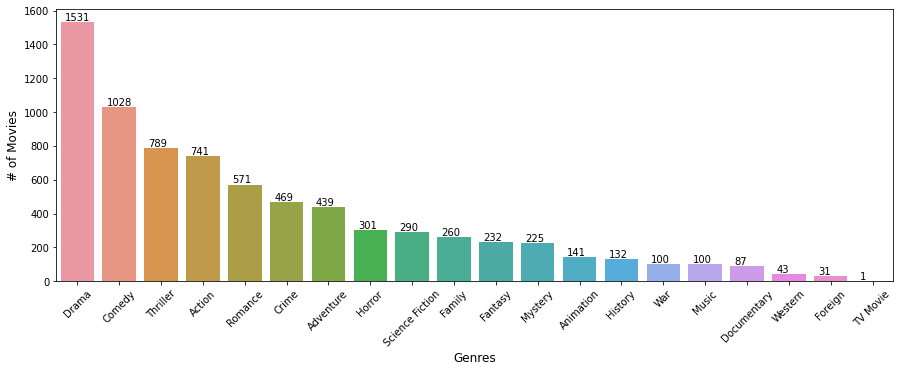

In [29]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='movies_count', data=genres_info, order=genres_info.sort_values('movies_count', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(int(p.get_height())), (p.get_x()+0.1, p.get_height()+10))
plt.xticks(rotation=45)
plt.ylabel('# of Movies', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

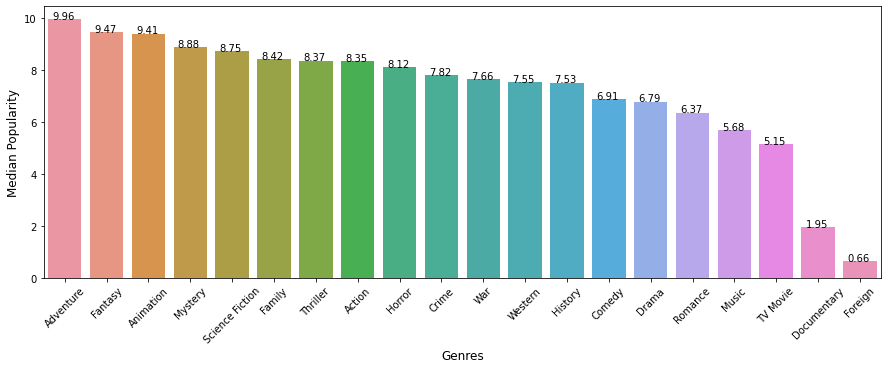

In [30]:
plt.figure(figsize=(15, 5))
ax = sns.barplot(x='genres', y='median_popularity', data=genres_info, order=genres_info.sort_values('median_popularity', ascending=False).genres)
for p in ax.patches:
        ax.annotate('{}'.format(np.round(p.get_height(), 2)), (p.get_x()+0.1, p.get_height()))
plt.xticks(rotation=45)
plt.ylabel('Median Popularity', fontsize=12)
plt.xlabel('Genres', fontsize=12)
plt.show()

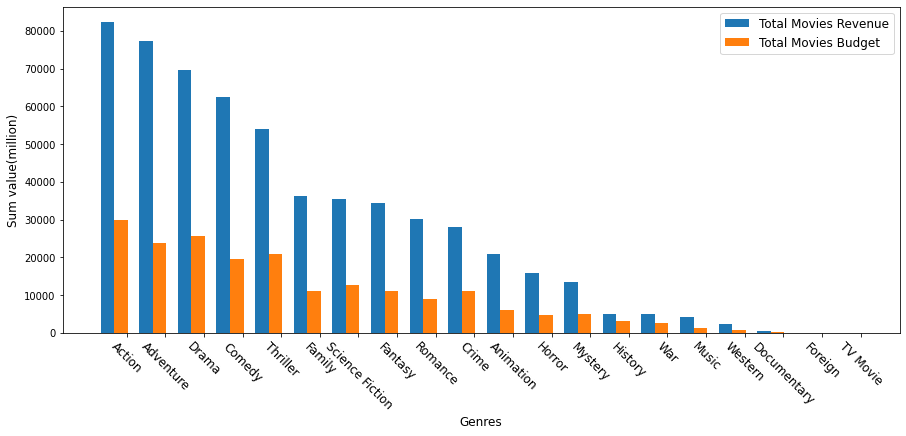

In [31]:
plt.figure(figsize=(15, 6))
x_indexes = np.arange(len(genres))     
width = 0.35                            
genres_info = genres_info.sort_values('total_revenue(million)', ascending=False)
plt.bar(x_indexes,  genres_info['total_revenue(million)'], label="Total Movies Revenue", width=width)
plt.bar(x_indexes + width,  genres_info['total_budget(million)'], label="Total Movies Budget", width=width)
plt.legend(loc="upper right", fontsize=12)
plt.xticks(ticks=x_indexes+0.5, labels=genres_info['genres'].values, fontsize=12, rotation=-45)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Sum value(million)', fontsize=12)
plt.show()

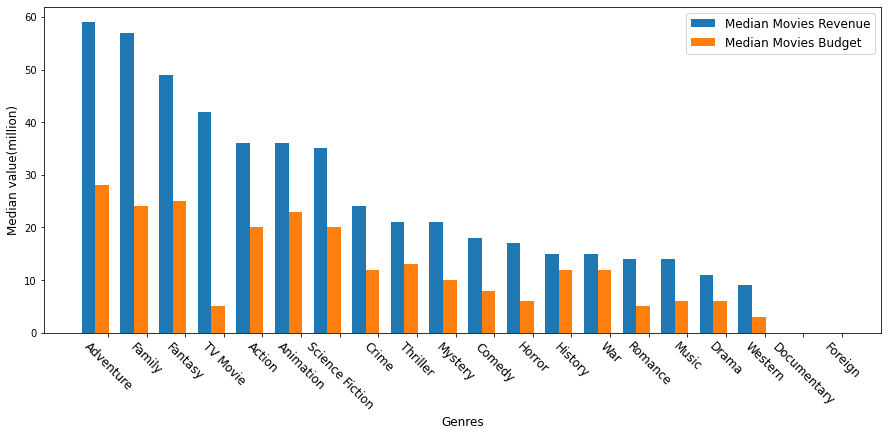

In [32]:
plt.figure(figsize=(15, 6))
x_indexes = np.arange(len(genres))     
width = 0.35                            
genres_info = genres_info.sort_values('median_revenue(million)', ascending=False)
plt.bar(x_indexes,  genres_info['median_revenue(million)'], label="Median Movies Revenue", width=width)
plt.bar(x_indexes + width,  genres_info['median_budget(million)'], label="Median Movies Budget", width=width)
plt.legend(loc="upper right", fontsize=12)
plt.xticks(ticks=x_indexes+0.5, labels=genres_info['genres'].values, fontsize=12, rotation=-45)
plt.xlabel('Genres', fontsize=12)
plt.ylabel('Median value(million)', fontsize=12)
plt.show()

Revenue

In [ ]:
plt.figure(figsize=(7, 7))
sns.boxplot(x='revenue', data=data_explore, orient='v')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim(0, 300000000)
ax.set_title('Distribution of Revenue')

Revenue Vs Budget

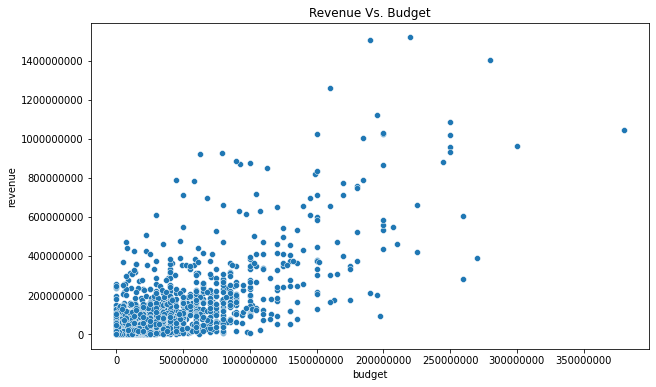

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='budget', y='revenue', data=data_explore)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Budget')
plt.show()

Revenue Vs Popularity

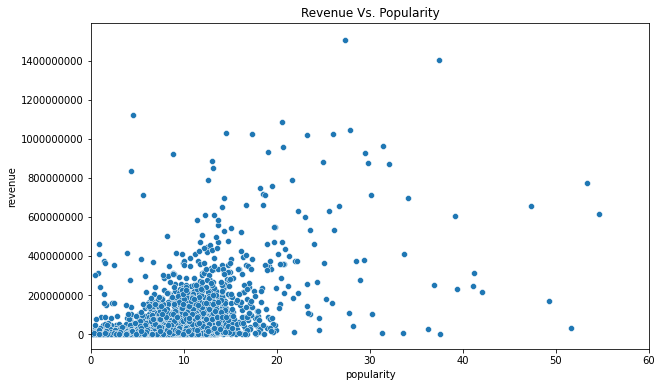

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='popularity', y='revenue', data=data_explore)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Popularity')
plt.xlim(0, 60)
plt.show()

Revenue vs Movie Runtime

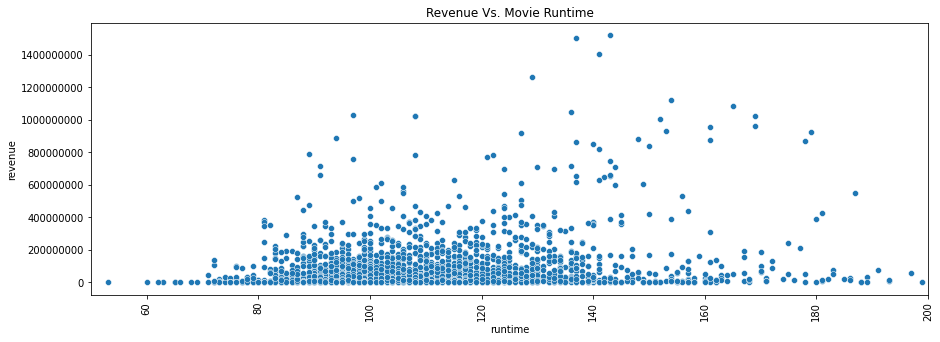

In [37]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='runtime', y='revenue', data=data_explore)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Movie Runtime')
plt.xlim(50, 200)
plt.show()

(31.5, 89.5)

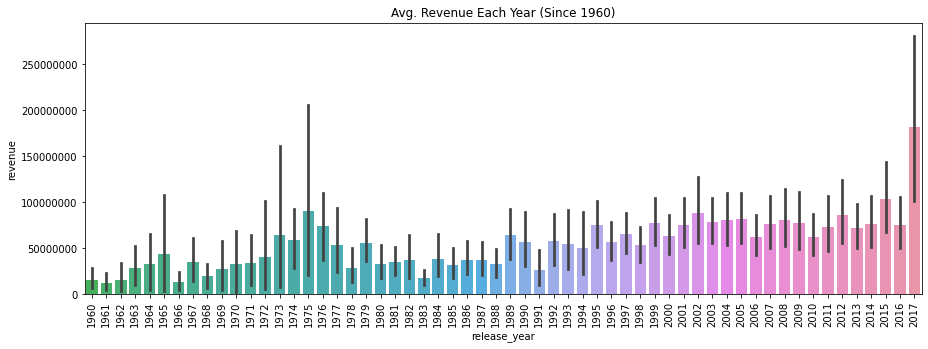

In [38]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_year', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Each Year (Since 1960)')
ax.set_xlim(left=31.5)

Text(0.5, 1.0, 'Avg. Revenue Each Month')

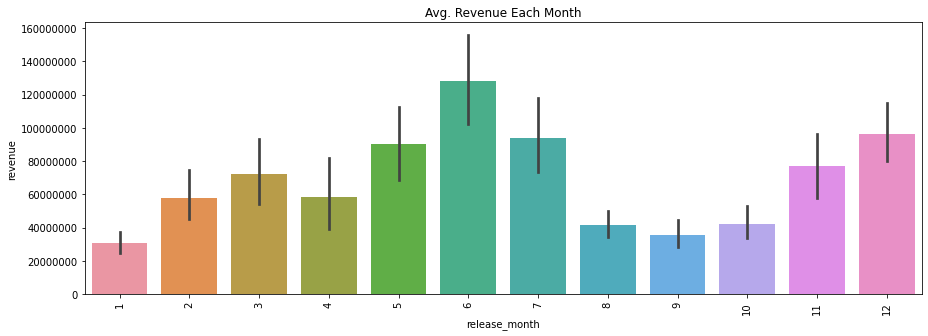

In [39]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_month', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue Each Month')

Text(0.5, 1.0, 'Avg. Revenue on Each Day of Week')

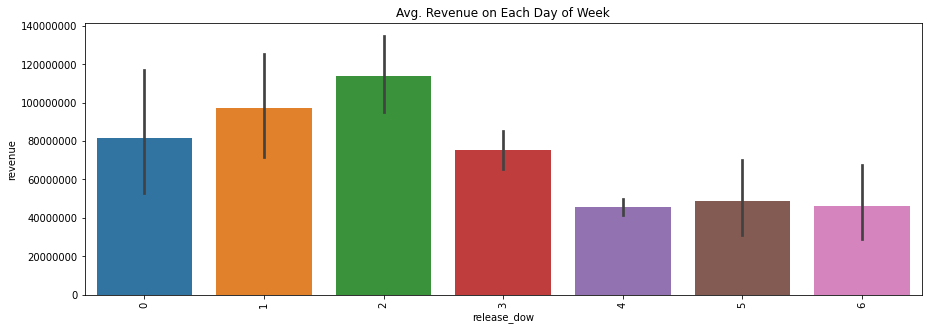

In [40]:
plt.figure(figsize=(15, 5))
sns.barplot(x='release_dow', y='revenue', data=data_explore, estimator=np.mean)
plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Avg. Revenue on Each Day of Week')

(-0.5, 15.5)

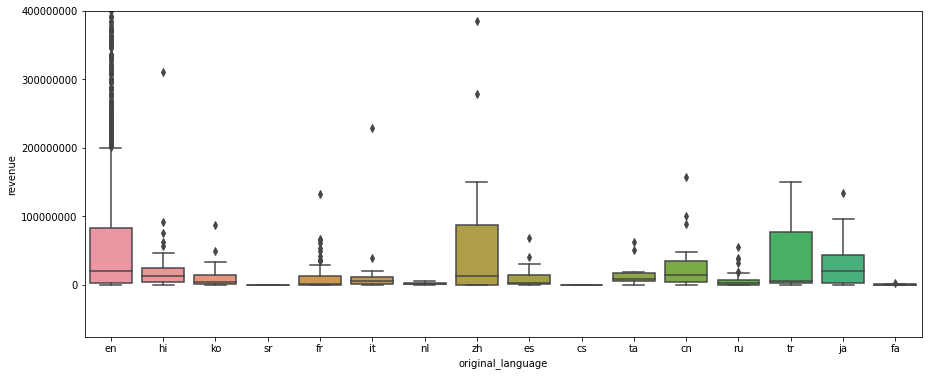

In [41]:
plt.figure(figsize=(15, 6))
sns.boxplot(x='original_language', y='revenue', data=data_explore)
# plt.xticks(rotation=90)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim(top=400000000)
ax.set_xlim(right=15.5)

In [42]:
def boxplot_sorted(df, by, column):
    # use dict comprehension to create new dataframe from the iterable groupby object
    # each group name becomes a column in the new dataframe
    df2 = pd.DataFrame({col:vals[column] for col, vals in df.groupby(by)})
    # find and sort the median values in this new dataframe
    meds = df2.mean().sort_values(ascending=False)
    # use the columns in the dataframe, ordered sorted by median value
    # return axes so changes can be made outside the function
    return df2[meds.index].boxplot()

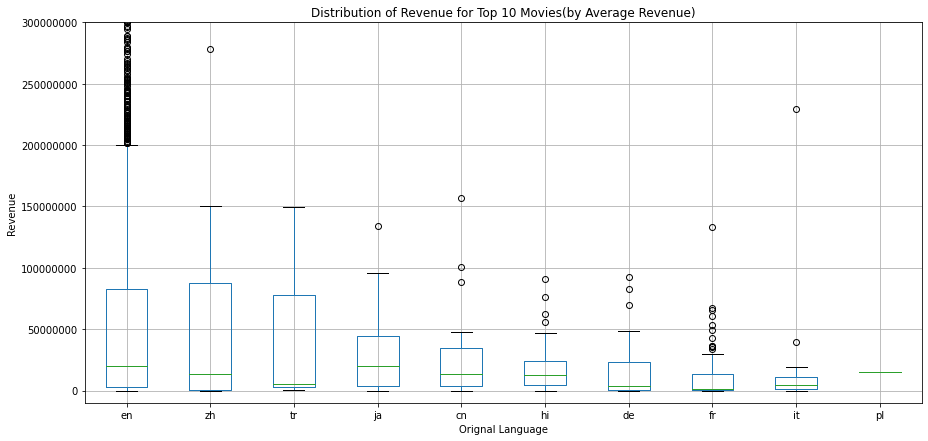

In [43]:
plt.figure(figsize=(15, 7))
axes = boxplot_sorted(data_explore, by = ['original_language'], column = 'revenue')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim((-10000000, 300000000))
ax.set_xlim(right=10.5)
plt.xlabel('Orignal Language')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue for Top 10 Movies(by Average Revenue)')
plt.show()

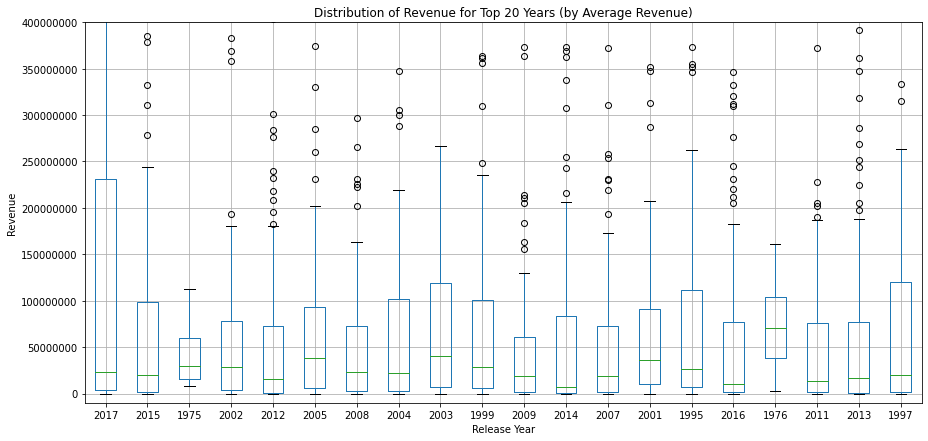

In [44]:
plt.figure(figsize=(15, 7))
axes = boxplot_sorted(data_explore, by = ['release_year'], column = 'revenue')
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_ylim((-10000000, 400000000))
ax.set_xlim(right=20.5)
plt.xlabel('Release Year')
plt.ylabel('Revenue')
plt.title('Distribution of Revenue for Top 20 Years (by Average Revenue)')
plt.show()

Correlation Plot

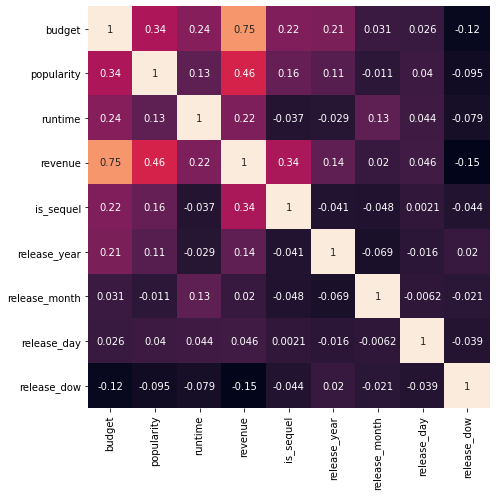

In [45]:
plt.figure(figsize=(12, 7))
corr_matrix = data_explore.corr()
sns.heatmap(corr_matrix, mask=np.zeros_like(corr_matrix, dtype=np.bool), square=True, annot=True, cbar=False)
plt.tight_layout()

In [46]:
corr_matrix['revenue'].sort_values(ascending=False)

revenue          1.000000
budget           0.752965
popularity       0.461460
is_sequel        0.339425
runtime          0.216417
release_year     0.137933
release_day      0.045699
release_month    0.020164
release_dow     -0.148046
Name: revenue, dtype: float64


Data Preprocessing

In [47]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, MultiLabelBinarizer

In [48]:
X = data.drop(columns=['revenue'], axis=1).copy()
y = data['revenue'].copy()
X.shape, y.shape

((3000, 22), (3000,))

In [49]:
from collections import Counter
top_30_values = dict()

list_of_genres_names = list(X['genres'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_30_genres = (Counter([i for j in list_of_genres_names for i in j]).most_common(30))
top_30_values['genres'] = [x for x, y in top_30_genres]

list_of_production_companies_names = list(X['production_companies'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_30_production_companies = (Counter([i for j in list_of_production_companies_names for i in j]).most_common(30))
top_30_values['production_companies'] = [x for x, y in top_30_production_companies]

list_of_production_countries_names = list(X['production_countries'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_30_production_countries = (Counter([i for j in list_of_production_countries_names for i in j]).most_common(30))
top_30_values['production_countries'] = [x for x, y in top_30_production_countries]

list_of_keywords = list(X['Keywords'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
top_30_keywords = (Counter([i for j in list_of_keywords for i in j]).most_common(30))
top_30_values['Keywords'] = [x for x, y in top_30_keywords]

list_of_cast_names = list(X['cast'].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x)).apply(lambda x: [i['name'] for i in x if i['order'] in (0, 1, 2)] if x != {} else []).values)
top_30_cast = (Counter([i for j in list_of_cast_names for i in j]).most_common(30))
top_30_values['cast'] = [x for x, y in top_30_cast]

In [50]:
drop_cols = ['id', 'homepage', 'imdb_id', 'original_title', 'spoken_languages', 'overview', 'poster_path', 'tagline', 'title', 'crew']
encoded_cols = [] # This will contain all the encoded column names of multivalued field

In [51]:
class CustomAttr(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        try:
            X['is_sequel'] = X['belongs_to_collection'].apply(lambda x: 0 if pd.isna(x) else 1)
#             print("is_sequel attribute added!")
            
            X['release_date']= X['release_date'].apply(lambda x: self.modify_date(x))
            
            X['release_year'] = pd.DatetimeIndex(X['release_date']).year
#             print("release_year attribute added!")
            
            X['release_month'] = pd.DatetimeIndex(X['release_date']).month
#             print("release_month attribute added!")
            
            X['release_day'] = pd.DatetimeIndex(X['release_date']).day
#             print("release_day attribute added!")
            
            X['release_dow'] = pd.DatetimeIndex(X['release_date']).dayofweek
#             print("release_dow attribute added!")
            
            X = X.drop(['belongs_to_collection', 'release_date'], axis=1)
#             print("belongs_to_collection, release_date attribute removed!")
            return X
        except Exception as e:
            print("CustomAttr: Exception caught: {}".format(e))

    @staticmethod
    def modify_date(x):
        """
            Converting date: mm/dd/YY to mm/dd/YYYY
            NaN date fields are handle here only.
        """
        try:
            if x is np.nan:
                x='01/01/00'
            x=str(x)
            year=x.split('/')[2]
            if int(year)<20:
                return x[:-2]+'20'+year
            else:
                return x[:-2]+'19'+year
        except Exception as e:
            print("CustomAttr: modify_date() function -  exception caught for date {}: {}".format(x,e))

In [52]:
class JSONHandler(BaseEstimator, TransformerMixin):
    def __init__(self):
        """
        For each multivalued field, there will be a MultiLabelBinarizer.
        """
        self.mlbs = dict()
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        for col in list(X.columns):
            try:
                X[col] = X[col].apply(lambda x: [] if pd.isna(x) else ast.literal_eval(x))
                X[col] = X[col].apply(lambda x: self.get_names(x, col))
                if not (col in self.mlbs.keys()):
                    self.mlbs[col] = MultiLabelBinarizer()
                    X_enc = pd.DataFrame(self.mlbs[col].fit_transform(X[col]),columns=self.mlbs[col].classes_, 
                                         index=X.index)
                    encoded_cols.extend(list(self.mlbs[col].classes_))
                else:
                    X_enc = pd.DataFrame(self.mlbs[col].transform(X[col]),columns=self.mlbs[col].classes_, 
                                         index=X.index)
                X = X.drop(col, axis=1)
                X = pd.concat([X, X_enc], axis=1)
#                 print("{}, {}, {}".format(col, X_enc.shape, X.shape))
#                 print("{} attribute encoded &  removed!".format(col))
            except Exception as e:
                print("JSONHandler: Exception caught for {}: {}".format(col,e))
        return X
       

    @staticmethod
    def get_names(x, col):
        """
            Get the name field value from JSON object.
        """
        names = []
        try:
            names = [item['name'] for item in x if item['name'] in top_30_values[col]]
            if len(names)==0:
                names.append('other_'+col)
            return names
        except Exception as e:
            print("JSONHandler: get_names() function -  exception caught {}: {}".format(x,e))

In [53]:
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                        ('scaler', PowerTransformer())])

cat_pipeline = Pipeline([('imputer', SimpleImputer(strategy='most_frequent')),
                         ('cat_enc', OneHotEncoder(handle_unknown='ignore'))])

pre_process = ColumnTransformer([('drop_cols', 'drop', drop_cols),
                                 ('num_process', num_pipeline, ['budget', 'popularity', 'runtime']),
                                 ('add_custom_attrs', CustomAttr(), ['belongs_to_collection', 'release_date']),
                                 ('cat_process', cat_pipeline, ['original_language', 'status']),
                                 ('jason_handler', JSONHandler(), ['genres', 'production_companies', 'production_countries', 'Keywords', 'cast'])], remainder='passthrough')

X_transformed = pre_process.fit_transform(X)
X_transformed.shape

(3000, 191)

In [54]:
from sklearn.model_selection import train_test_split

X_train_transformed, X_test_transformed, y_train, y_test = train_test_split(X_transformed, np.log1p(y), test_size=0.2, random_state=42)
X_train_transformed.shape, X_test_transformed.shape


((2400, 191), (600, 191))

In [55]:
feature_columns = ['budget', 'popularity', 'runtime', 'is_sequel', 'release_year', 'release_month', 'release_day', 'release_dow'] + list(pre_process.transformers_[3][1]['cat_enc'].get_feature_names(['original_language', 'status'])) + encoded_cols
len(feature_columns)

191

In [56]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [57]:
from sklearn.model_selection import cross_val_score

results = []

def performance_measures(model, store_results=True):    
    train_rmses = cross_val_score(model, X_train_transformed, y_train, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)
    train_rmses *= -1
    train_mean_rmse = np.mean(train_rmses)
    
    test_rmses = cross_val_score(model, X_test_transformed, y_test, scoring='neg_root_mean_squared_error', cv=kf, n_jobs=-1)
    test_rmses *= -1
    test_mean_rmse = np.mean(test_rmses)
    
    print("Train Mean RMSE: {}\nTest Mean RMSE: {}".format(train_mean_rmse, test_mean_rmse))
    
    if store_results:
        results.append([model.__class__.__name__, train_mean_rmse, test_mean_rmse])

In [58]:
def plot_feature_importance(feature_columns, importance_values):
    feature_imp = [ col for col in zip(feature_columns, importance_values)]
    feature_imp.sort(key=lambda x:x[1], reverse=True)

    imp = pd.DataFrame(feature_imp[0:15], columns=['feature', 'importance'])
    plt.figure(figsize=(10, 8))
    sns.barplot(y='feature', x='importance', data=imp, orient='h')
    plt.title('15 Most Important Features', fontsize=16)
    plt.ylabel("Feature", fontsize=16)
    plt.xlabel("")
    plt.show()

In [59]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, random_state=42)
ridge_reg.fit(X_train_transformed, y_train)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=42, solver='auto', tol=0.001)

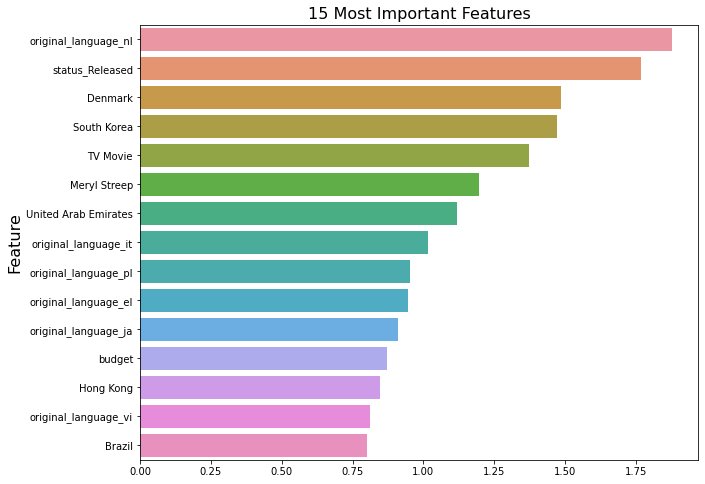

In [60]:
plot_feature_importance(feature_columns, ridge_reg.coef_)

In [61]:
performance_measures(ridge_reg)

Train Mean RMSE: 2.280825859394565
Test Mean RMSE: 2.2640436085006472


In [62]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=500, max_depth=16, max_features=0.2, n_jobs=-1, random_state=42)
forest_reg.fit(X_train_transformed, y_train)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features=0.2, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=500, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

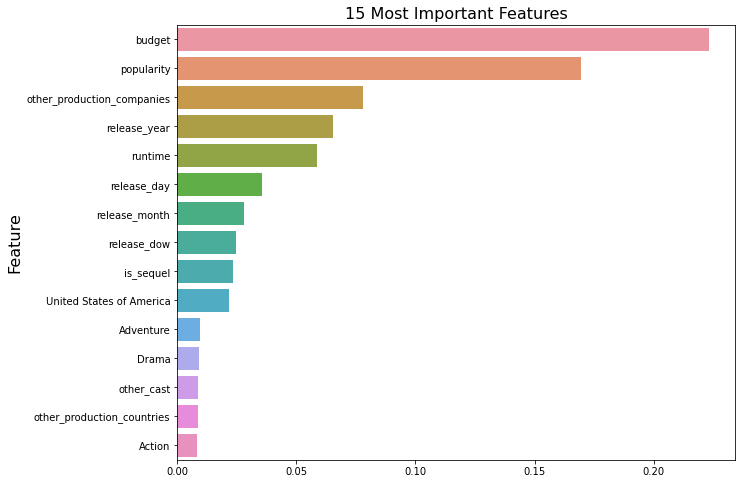

In [63]:
plot_feature_importance(feature_columns, forest_reg.feature_importances_)

In [64]:
performance_measures(forest_reg)

Train Mean RMSE: 2.1498046357179144
Test Mean RMSE: 2.0634914470426104


In [65]:
pd.DataFrame(results, columns=['Model', 'Train RMSE', 'Test RMSE'])

,Model,Train RMSE,Test RMSE
0,Ridge,2.280826,2.264044
1,RandomForestRegressor,2.149805,2.063491


Random Forest Regressor is working better

In [66]:
predicted_revenue = forest_reg.predict(X_transformed)
overall_data = X.copy()
overall_data['revenue'] = y.copy()
overall_data['predicted_revenue'] = np.expm1(predicted_revenue)

In [67]:
overall_data.head(n=2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,predicted_revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,5.074711e+07
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,9.488236e+07


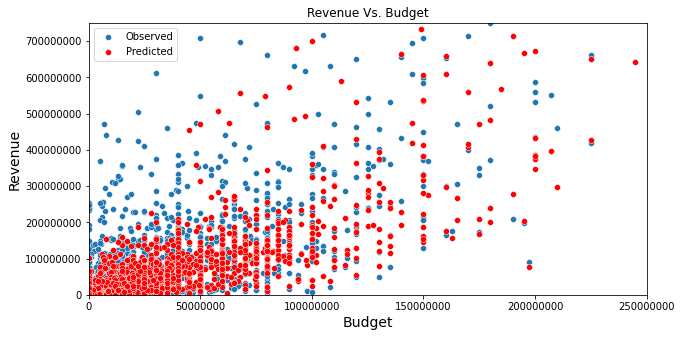

In [68]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='budget', y='revenue', data=overall_data, label='Observed')
sns.scatterplot(x='budget', y='predicted_revenue', data=overall_data, color='red', label='Predicted')
plt.ylim(0, 750000000)
plt.xlim(0, 250000000)
plt.xlabel('Budget', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Budget')
plt.show()



We can see that model is failed to predict the high revenue movies. There are many low budget high earning movies for which model has predicted less revenue. Also model is less accuracte for high budget films.


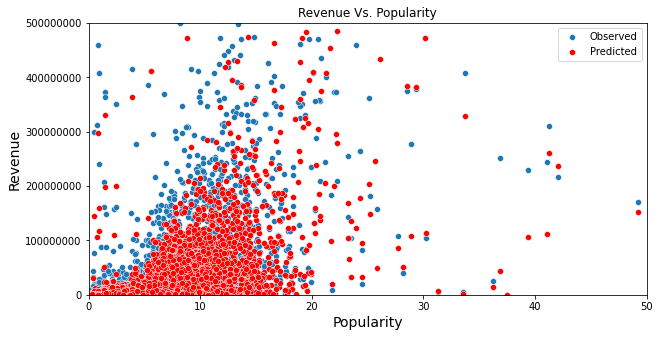

In [69]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='popularity', y='revenue', data=overall_data, label='Observed')
sns.scatterplot(x='popularity', y='predicted_revenue', data=overall_data, color='red', label='Predicted')
plt.ylim(0, 500000000)
plt.xlim(0, 50)
plt.xlabel('Popularity', fontsize=14)
plt.ylabel('Revenue', fontsize=14)
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_scientific(False)
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.set_title('Revenue Vs. Popularity')
plt.show()

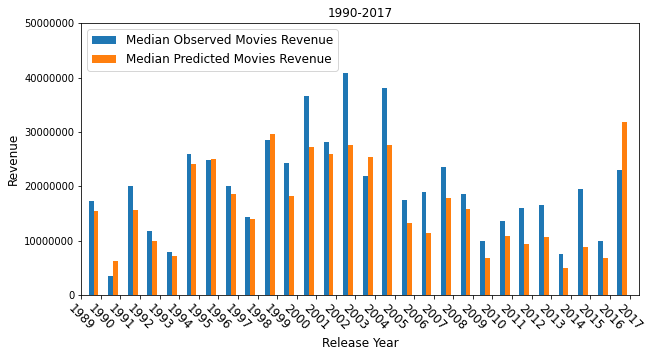

In [70]:
year_info = overall_data[['release_date', 'revenue', 'predicted_revenue']].copy()
year_info['release_date']=year_info['release_date'].apply(lambda x: modify_date(x))
year_info['release_year'] = pd.DatetimeIndex(year_info['release_date']).year
year_info = year_info.groupby(['release_year']).median()
year_info = year_info.sort_values('release_year')

release_years = list(year_info.index)
x_indexes = np.arange(len(release_years))     
width = 0.25                            

plt.figure(figsize=(10, 5))
plt.bar(x_indexes,  year_info['revenue'], label="Median Observed Movies Revenue", width=width)
plt.bar(x_indexes + width,  year_info['predicted_revenue'], label="Median Predicted Movies Revenue", width=width)
plt.legend(loc="upper left", fontsize=12)
plt.xticks(ticks=x_indexes+0.5, labels=release_years, fontsize=12, rotation=-45)
plt.title('1990-2017')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xlim(left=61.5, right=90)
plt.ylim(top=50000000)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

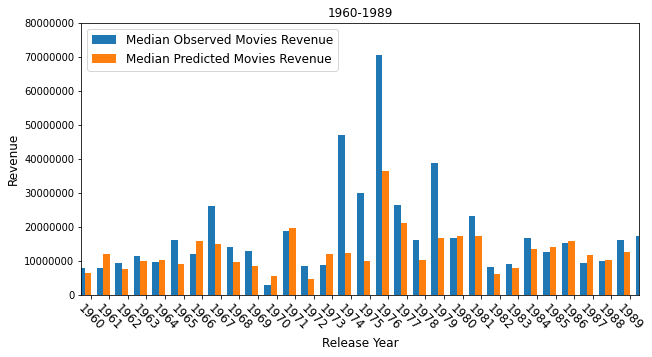

In [71]:
x_indexes = np.arange(len(release_years))     
width = 0.35                            

plt.figure(figsize=(10, 5))
plt.bar(x_indexes,  year_info['revenue'], label="Median Observed Movies Revenue", width=width)
plt.bar(x_indexes + width,  year_info['predicted_revenue'], label="Median Predicted Movies Revenue", width=width)
plt.legend(loc="upper left", fontsize=12)
plt.xticks(ticks=x_indexes+0.5, labels=release_years, fontsize=12, rotation=-45)
plt.title('1960-1989')
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Revenue', fontsize=12)
plt.xlim(left=32, right=62)
plt.ylim(top=80000000)
ax = plt.gca()
ax.get_yaxis().get_major_formatter().set_scientific(False)
plt.show()

In [72]:
final_model = Pipeline([('pre_process', pre_process),
                        ('forest_reg', forest_reg)])
final_model.fit(X, np.log1p(y))

Pipeline(memory=None,
         steps=[('pre_process',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('drop_cols', 'drop',
                                                  ['id', 'homepage', 'imdb_id',
                                                   'original_title',
                                                   'spoken_languages',
                                                   'overview', 'poster_path',
                                                   'tagline', 'title',
                                                   'crew']),
                                                 ('num_process',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                       

In [73]:
test_data = pd.read_csv('/content/drive/MyDrive/Sem 5&6/BDA_Project/TMDBBoxOffice Revenue/test.csv')
print(test_data.shape)
test_data.head(n=3)

(4398, 22)


,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."


In [74]:
test_data.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [75]:
predictions = final_model.predict(test_data)
predictions = np.expm1(predictions)

In [76]:
output = pd.DataFrame(test_data['title'])
output['revenue'] = predictions.copy()

In [77]:
output.head()

,title,revenue
0,Pokémon: The Rise of Darkrai,4.312409e+06
1,Attack of the 50 Foot Woman,1.574562e+06
2,Addicted to Love,6.327415e+06
3,Incendies,1.014175e+06
4,Inside Deep Throat,6.030557e+05


In [78]:
output.to_csv("/content/drive/MyDrive/Sem 5&6/BDA_Project/TMDBBoxOffice Revenue/ouput.csv")